In [1]:
"""
First insights:

* If an input is trained, it will stay stable, even if it receives less inputs in a second run
* If an input was trained less in a first run, it will strenghten its connections later if its stimuated more often then
* But in this case it will take much more time, since only few spikes are available which takes some time to build up
* If both inputs are trained strongly, further activating patterns have not really any impact anymore
-> An input aquires a specific amount of neurons and stably saturates
-> If it's relatively weak in the beginning it can still become saturates, but then it takes longer
"""
print('')

In [2]:
import os
import sys

path = '/home/seq/pelenet'
sys.path.append(path)
os.chdir(path)

In [3]:
# Allow reload of objects
%load_ext autoreload
%autoreload

from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment
from pelenet.experiments.assembliesoutput import AssemblyOutputExperiment

# Official modules
import numpy as np
from scipy import sparse
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time
from copy import deepcopy

In [4]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 1,  # Random seed
    'trials': 40, #20,  # Number of trials
    'stepsPerTrial': 40, #50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35, #35 # Number of connections per neuron
    # Noise
    'isNoise': True,
    'onlyExcitatory': True,  # Noisy input is only excitatory
    'noiseMaxWeight': 120, #120,
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100, #100 # Voltage time constant
    'currentTau': 6, #5 # Current time constant
    'thresholdMant': 1200,  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningEpoch': 4,
    'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*x0*y0 - 2^-3*y0*w*w', #'2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*y0 - 2^-3*y0*w*w',
    #'learningRule': '2^-3*x1*y1*x0*y0 - 2^-3*y0*w*w',
    #'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-3*y0*w*w',
    # Input
    'inputIsVary': True,
    'inputOffset': 10,
    'inputVaryProbs': [0.1, 0.9],
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 20, #30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [5]:
# Initilizes the experiment and utils
exp = AssemblyExperiment(name='assemblies', parameters=parameters)
utils = Utils.instance()

In [6]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

0.922

In [7]:
#exp.net.plot.initialExWeightDistribution()

In [8]:
#exp.net.noiseWeights.toarray()[:20,:20]

In [9]:
pars = exp.net.p

In [10]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:42671
INFO:DRV:      Host server up..............Done 0.50s
INFO:DRV:      Encoding axons/synapses.....Done 0.42s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1616060034.2807434
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1616060034.2807434/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/

INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1616060034.2807434/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 60, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61 to 70
INFO:HST:  chip=0 cpu=0 Reset functional state at 70
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 121 to 130
INFO:HST:  chip=0 cpu=0 Reset functional state at 130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 181 to 190
INFO:HST:  chip=0 cpu=0 Reset functional state at 190
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 241 to 250
INFO:HST:  chip=0 cpu=0 Reset functional state at 250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 301 to 31

INFO:HST:  chip=0 cpu=0 Reset functional state at 2230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2281 to 2290
INFO:HST:  chip=0 cpu=0 Reset functional state at 2290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2341 to 2350
INFO:HST:  chip=0 cpu=0 Reset functional state at 2350
INFO:DRV:      Executing...................Done 58.70s
INFO:DRV:      Processing timeseries.......Done 2.86s
INFO:DRV:  Executor: 2400 timesteps........Done 62.99s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


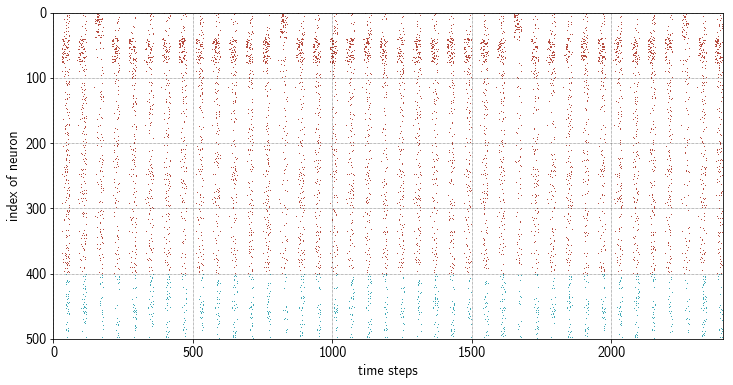

In [11]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6))

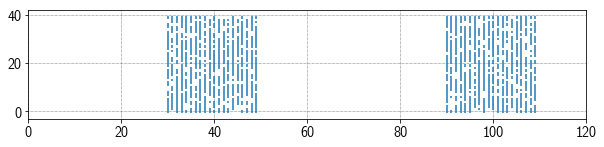

In [12]:
plt.figure(figsize=(10,2))
plt.xlim((0,120))
pl = plt.eventplot(exp.net.inputSpikes)

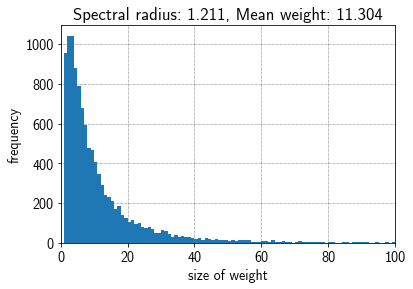

In [13]:
exp.net.plot.initialExWeightDistribution(figsize=(6,4), xlim=(0,100))

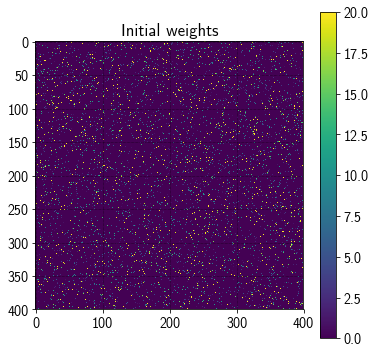

In [14]:
# Weight matrix before learning
exp.net.plot.initialExWeightMatrix()

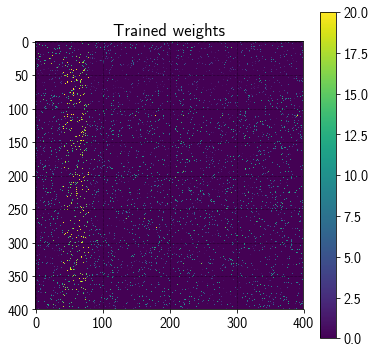

In [15]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

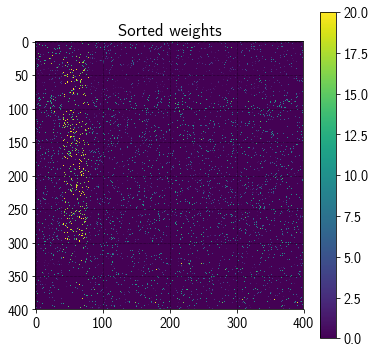

In [16]:
# Sorted weight matrix after learning
expSupportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex[-1])
exp.net.plot.weightsSortedBySupport(expSupportMask, exp.net.trainedWeightsExex[-1])

In [17]:
nCs = exp.net.p.inputNumTargetNeurons
nEx = exp.net.p.reservoirExSize
nC = exp.net.p.inputVaryNum

In [18]:
nCs, nEx, nC

(40, 400, 2)

In [19]:
#weightsExEx = exp.net.trainedWeightsExex[-1]
#np.save('weightsExEx', weightsExEx)

In [20]:
inputs = utils.getInputLetterList(exp.net.inputTrials)

In [21]:
supportMasks = utils.getSupportMasksForAllTrials(exp.net.initialWeights.exex, exp.net.trainedWeightsExex)

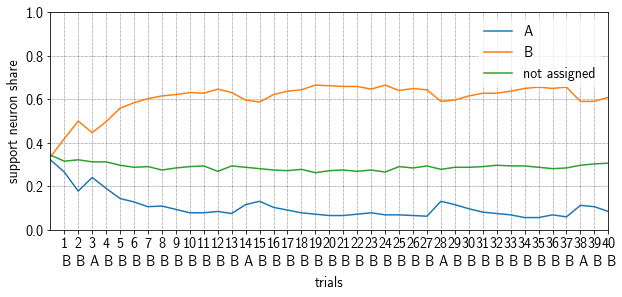

In [22]:
exp.net.plot.supportShare(supportMasks)

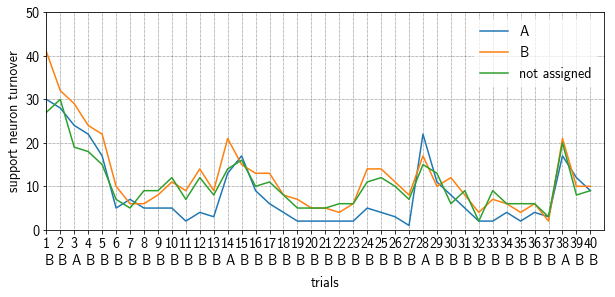

In [23]:
exp.net.plot.supportTurnover(supportMasks)

In [50]:
# Meta parameters
nAssemblies = exp.net.p.inputVaryNum
assemblyIndex = 1
nTrain = 500
nTest = 100
nTrials = nAssemblies * (nTrain + nTest)

# New parameters
newParameters = {
    **parameters,
    'trials': nTrials,
    # Noise
    'isNoise': False,
    # Input
    'inputIsVary': False,
    'inputOffset': 0,
    'inputWeightDistribution': 'max',
    # Neuron
    'thresholdMant': 500,
    # Plasticity
    'isLearningRule': False,
}

In [51]:
# Initilizes a second experiment
exp2 = AssemblyOutputExperiment(name='assemblies-output', parameters=newParameters)

In [52]:
# Get weights from previous experiment
weights = deepcopy(exp.net.initialWeights)
weights.exex = exp.net.trainedWeightsExex[-1]
#weights.exex = sparse.csr_matrix(np.zeros((400,400)))

# Define inputs
#inputDataset = exp2.loadYinYangAsInputs(nAssemblies=nAssemblies, nTrain=nTrain, nTest=nTest)
inputDataset = exp2.loadMnistAsInputs(nAssemblies=nAssemblies, nTrain=nTrain, nTest=nTest)

# Build experiment
exp2.build(
    supportMask=supportMasks[-1],
    mask=exp.net.initialMasks,
    weights=weights,
    assemblyIndex=assemblyIndex,
    inputSpikeIndices=inputDataset
)

In [53]:
# Run network
exp2.run()

INFO:DRV:  Connecting to 127.0.0.1:42505
INFO:DRV:      Host server up..............Done 0.52s
INFO:DRV:      Encoding axons/synapses.....Done 0.31s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1616060885.9240887
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1616060885.9240887/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/

INFO:DRV:      Encoding probes.............Done 0.39s
INFO:DRV:      Transferring probes.........Done 0.06s
INFO:DRV:      Configuring registers.......Done 0.37s
INFO:DRV:      Transferring spikes.........Done 2.24s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1616060885.9240887/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 60, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61 to 70
INFO:HST:  chip=0 cpu=0 Reset functional state at 70
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 121 to 130
INFO:HST:  chip=0 cpu=0 Reset functional state at 130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1261 to 1270
INFO:HST:  chip=0 cpu=0 Reset functional state at 1270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1321 to 1330
INFO:HST:  chip=0 cpu=0 Reset functional state at 1330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1381 to 1390
INFO:HST:  chip=0 cpu=0 Reset functional state at 1390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1441 to 1450
INFO:HST:  chip=0 cpu=0 Reset functional state at 1450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1501 to 1510
INFO:HST:  chip=0 cpu=0 Reset functional state at 1510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1561 to 1570
INFO:HST:  chip=0 cpu=0 Reset functional state at 1570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1621 to 1630
INFO:HST:  chip=0 cpu=0 Reset functional state at 1630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1681 to 1690
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2761 to 2770
INFO:HST:  chip=0 cpu=0 Reset functional state at 2770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2821 to 2830
INFO:HST:  chip=0 cpu=0 Reset functional state at 2830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2881 to 2890
INFO:HST:  chip=0 cpu=0 Reset functional state at 2890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2941 to 2950
INFO:HST:  chip=0 cpu=0 Reset functional state at 2950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3001 to 3010
INFO:HST:  chip=0 cpu=0 Reset functional state at 3010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3061 to 3070
INFO:HST:  chip=0 cpu=0 Reset functional state at 3070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3121 to 3130
INFO:HST:  chip=0 cpu=0 Reset functional state at 3130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3181 to 3190
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4261 to 4270
INFO:HST:  chip=0 cpu=0 Reset functional state at 4270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4321 to 4330
INFO:HST:  chip=0 cpu=0 Reset functional state at 4330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4381 to 4390
INFO:HST:  chip=0 cpu=0 Reset functional state at 4390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4441 to 4450
INFO:HST:  chip=0 cpu=0 Reset functional state at 4450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4501 to 4510
INFO:HST:  chip=0 cpu=0 Reset functional state at 4510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4561 to 4570
INFO:HST:  chip=0 cpu=0 Reset functional state at 4570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4621 to 4630
INFO:HST:  chip=0 cpu=0 Reset functional state at 4630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4681 to 4690
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5761 to 5770
INFO:HST:  chip=0 cpu=0 Reset functional state at 5770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5821 to 5830
INFO:HST:  chip=0 cpu=0 Reset functional state at 5830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5881 to 5890
INFO:HST:  chip=0 cpu=0 Reset functional state at 5890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5941 to 5950
INFO:HST:  chip=0 cpu=0 Reset functional state at 5950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6001 to 6010
INFO:HST:  chip=0 cpu=0 Reset functional state at 6010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6061 to 6070
INFO:HST:  chip=0 cpu=0 Reset functional state at 6070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6121 to 6130
INFO:HST:  chip=0 cpu=0 Reset functional state at 6130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6181 to 6190
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7261 to 7270
INFO:HST:  chip=0 cpu=0 Reset functional state at 7270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7321 to 7330
INFO:HST:  chip=0 cpu=0 Reset functional state at 7330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7381 to 7390
INFO:HST:  chip=0 cpu=0 Reset functional state at 7390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7441 to 7450
INFO:HST:  chip=0 cpu=0 Reset functional state at 7450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7501 to 7510
INFO:HST:  chip=0 cpu=0 Reset functional state at 7510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7561 to 7570
INFO:HST:  chip=0 cpu=0 Reset functional state at 7570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7621 to 7630
INFO:HST:  chip=0 cpu=0 Reset functional state at 7630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7681 to 7690
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 8761 to 8770
INFO:HST:  chip=0 cpu=0 Reset functional state at 8770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 8821 to 8830
INFO:HST:  chip=0 cpu=0 Reset functional state at 8830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 8881 to 8890
INFO:HST:  chip=0 cpu=0 Reset functional state at 8890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 8941 to 8950
INFO:HST:  chip=0 cpu=0 Reset functional state at 8950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9001 to 9010
INFO:HST:  chip=0 cpu=0 Reset functional state at 9010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9061 to 9070
INFO:HST:  chip=0 cpu=0 Reset functional state at 9070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9121 to 9130
INFO:HST:  chip=0 cpu=0 Reset functional state at 9130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9181 to 9190
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10261 to 10270
INFO:HST:  chip=0 cpu=0 Reset functional state at 10270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10321 to 10330
INFO:HST:  chip=0 cpu=0 Reset functional state at 10330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10381 to 10390
INFO:HST:  chip=0 cpu=0 Reset functional state at 10390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10441 to 10450
INFO:HST:  chip=0 cpu=0 Reset functional state at 10450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10501 to 10510
INFO:HST:  chip=0 cpu=0 Reset functional state at 10510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10561 to 10570
INFO:HST:  chip=0 cpu=0 Reset functional state at 10570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10621 to 10630
INFO:HST:  chip=0 cpu=0 Reset functional state at 10630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10681 to 10690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11761 to 11770
INFO:HST:  chip=0 cpu=0 Reset functional state at 11770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11821 to 11830
INFO:HST:  chip=0 cpu=0 Reset functional state at 11830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11881 to 11890
INFO:HST:  chip=0 cpu=0 Reset functional state at 11890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11941 to 11950
INFO:HST:  chip=0 cpu=0 Reset functional state at 11950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 12001 to 12010
INFO:HST:  chip=0 cpu=0 Reset functional state at 12010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 12061 to 12070
INFO:HST:  chip=0 cpu=0 Reset functional state at 12070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 12121 to 12130
INFO:HST:  chip=0 cpu=0 Reset functional state at 12130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 12181 to 12190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13261 to 13270
INFO:HST:  chip=0 cpu=0 Reset functional state at 13270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13321 to 13330
INFO:HST:  chip=0 cpu=0 Reset functional state at 13330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13381 to 13390
INFO:HST:  chip=0 cpu=0 Reset functional state at 13390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13441 to 13450
INFO:HST:  chip=0 cpu=0 Reset functional state at 13450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13501 to 13510
INFO:HST:  chip=0 cpu=0 Reset functional state at 13510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13561 to 13570
INFO:HST:  chip=0 cpu=0 Reset functional state at 13570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13621 to 13630
INFO:HST:  chip=0 cpu=0 Reset functional state at 13630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13681 to 13690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 14761 to 14770
INFO:HST:  chip=0 cpu=0 Reset functional state at 14770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 14821 to 14830
INFO:HST:  chip=0 cpu=0 Reset functional state at 14830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 14881 to 14890
INFO:HST:  chip=0 cpu=0 Reset functional state at 14890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 14941 to 14950
INFO:HST:  chip=0 cpu=0 Reset functional state at 14950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15001 to 15010
INFO:HST:  chip=0 cpu=0 Reset functional state at 15010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15061 to 15070
INFO:HST:  chip=0 cpu=0 Reset functional state at 15070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15121 to 15130
INFO:HST:  chip=0 cpu=0 Reset functional state at 15130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15181 to 15190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16261 to 16270
INFO:HST:  chip=0 cpu=0 Reset functional state at 16270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16321 to 16330
INFO:HST:  chip=0 cpu=0 Reset functional state at 16330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16381 to 16390
INFO:HST:  chip=0 cpu=0 Reset functional state at 16390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16441 to 16450
INFO:HST:  chip=0 cpu=0 Reset functional state at 16450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16501 to 16510
INFO:HST:  chip=0 cpu=0 Reset functional state at 16510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16561 to 16570
INFO:HST:  chip=0 cpu=0 Reset functional state at 16570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16621 to 16630
INFO:HST:  chip=0 cpu=0 Reset functional state at 16630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16681 to 16690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17761 to 17770
INFO:HST:  chip=0 cpu=0 Reset functional state at 17770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17821 to 17830
INFO:HST:  chip=0 cpu=0 Reset functional state at 17830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17881 to 17890
INFO:HST:  chip=0 cpu=0 Reset functional state at 17890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17941 to 17950
INFO:HST:  chip=0 cpu=0 Reset functional state at 17950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 18001 to 18010
INFO:HST:  chip=0 cpu=0 Reset functional state at 18010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 18061 to 18070
INFO:HST:  chip=0 cpu=0 Reset functional state at 18070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 18121 to 18130
INFO:HST:  chip=0 cpu=0 Reset functional state at 18130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 18181 to 18190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19261 to 19270
INFO:HST:  chip=0 cpu=0 Reset functional state at 19270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19321 to 19330
INFO:HST:  chip=0 cpu=0 Reset functional state at 19330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19381 to 19390
INFO:HST:  chip=0 cpu=0 Reset functional state at 19390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19441 to 19450
INFO:HST:  chip=0 cpu=0 Reset functional state at 19450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19501 to 19510
INFO:HST:  chip=0 cpu=0 Reset functional state at 19510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19561 to 19570
INFO:HST:  chip=0 cpu=0 Reset functional state at 19570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19621 to 19630
INFO:HST:  chip=0 cpu=0 Reset functional state at 19630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19681 to 19690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 20761 to 20770
INFO:HST:  chip=0 cpu=0 Reset functional state at 20770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 20821 to 20830
INFO:HST:  chip=0 cpu=0 Reset functional state at 20830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 20881 to 20890
INFO:HST:  chip=0 cpu=0 Reset functional state at 20890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 20941 to 20950
INFO:HST:  chip=0 cpu=0 Reset functional state at 20950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21001 to 21010
INFO:HST:  chip=0 cpu=0 Reset functional state at 21010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21061 to 21070
INFO:HST:  chip=0 cpu=0 Reset functional state at 21070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21121 to 21130
INFO:HST:  chip=0 cpu=0 Reset functional state at 21130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21181 to 21190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22261 to 22270
INFO:HST:  chip=0 cpu=0 Reset functional state at 22270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22321 to 22330
INFO:HST:  chip=0 cpu=0 Reset functional state at 22330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22381 to 22390
INFO:HST:  chip=0 cpu=0 Reset functional state at 22390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22441 to 22450
INFO:HST:  chip=0 cpu=0 Reset functional state at 22450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22501 to 22510
INFO:HST:  chip=0 cpu=0 Reset functional state at 22510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22561 to 22570
INFO:HST:  chip=0 cpu=0 Reset functional state at 22570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22621 to 22630
INFO:HST:  chip=0 cpu=0 Reset functional state at 22630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 22681 to 22690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23761 to 23770
INFO:HST:  chip=0 cpu=0 Reset functional state at 23770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23821 to 23830
INFO:HST:  chip=0 cpu=0 Reset functional state at 23830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23881 to 23890
INFO:HST:  chip=0 cpu=0 Reset functional state at 23890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23941 to 23950
INFO:HST:  chip=0 cpu=0 Reset functional state at 23950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 24001 to 24010
INFO:HST:  chip=0 cpu=0 Reset functional state at 24010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 24061 to 24070
INFO:HST:  chip=0 cpu=0 Reset functional state at 24070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 24121 to 24130
INFO:HST:  chip=0 cpu=0 Reset functional state at 24130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 24181 to 24190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25261 to 25270
INFO:HST:  chip=0 cpu=0 Reset functional state at 25270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25321 to 25330
INFO:HST:  chip=0 cpu=0 Reset functional state at 25330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25381 to 25390
INFO:HST:  chip=0 cpu=0 Reset functional state at 25390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25441 to 25450
INFO:HST:  chip=0 cpu=0 Reset functional state at 25450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25501 to 25510
INFO:HST:  chip=0 cpu=0 Reset functional state at 25510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25561 to 25570
INFO:HST:  chip=0 cpu=0 Reset functional state at 25570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25621 to 25630
INFO:HST:  chip=0 cpu=0 Reset functional state at 25630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25681 to 25690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 26761 to 26770
INFO:HST:  chip=0 cpu=0 Reset functional state at 26770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 26821 to 26830
INFO:HST:  chip=0 cpu=0 Reset functional state at 26830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 26881 to 26890
INFO:HST:  chip=0 cpu=0 Reset functional state at 26890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 26941 to 26950
INFO:HST:  chip=0 cpu=0 Reset functional state at 26950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27001 to 27010
INFO:HST:  chip=0 cpu=0 Reset functional state at 27010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27061 to 27070
INFO:HST:  chip=0 cpu=0 Reset functional state at 27070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27121 to 27130
INFO:HST:  chip=0 cpu=0 Reset functional state at 27130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27181 to 27190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28261 to 28270
INFO:HST:  chip=0 cpu=0 Reset functional state at 28270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28321 to 28330
INFO:HST:  chip=0 cpu=0 Reset functional state at 28330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28381 to 28390
INFO:HST:  chip=0 cpu=0 Reset functional state at 28390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28441 to 28450
INFO:HST:  chip=0 cpu=0 Reset functional state at 28450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28501 to 28510
INFO:HST:  chip=0 cpu=0 Reset functional state at 28510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28561 to 28570
INFO:HST:  chip=0 cpu=0 Reset functional state at 28570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28621 to 28630
INFO:HST:  chip=0 cpu=0 Reset functional state at 28630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 28681 to 28690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29761 to 29770
INFO:HST:  chip=0 cpu=0 Reset functional state at 29770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29821 to 29830
INFO:HST:  chip=0 cpu=0 Reset functional state at 29830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29881 to 29890
INFO:HST:  chip=0 cpu=0 Reset functional state at 29890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29941 to 29950
INFO:HST:  chip=0 cpu=0 Reset functional state at 29950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 30001 to 30010
INFO:HST:  chip=0 cpu=0 Reset functional state at 30010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 30061 to 30070
INFO:HST:  chip=0 cpu=0 Reset functional state at 30070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 30121 to 30130
INFO:HST:  chip=0 cpu=0 Reset functional state at 30130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 30181 to 30190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31261 to 31270
INFO:HST:  chip=0 cpu=0 Reset functional state at 31270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31321 to 31330
INFO:HST:  chip=0 cpu=0 Reset functional state at 31330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31381 to 31390
INFO:HST:  chip=0 cpu=0 Reset functional state at 31390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31441 to 31450
INFO:HST:  chip=0 cpu=0 Reset functional state at 31450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31501 to 31510
INFO:HST:  chip=0 cpu=0 Reset functional state at 31510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31561 to 31570
INFO:HST:  chip=0 cpu=0 Reset functional state at 31570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31621 to 31630
INFO:HST:  chip=0 cpu=0 Reset functional state at 31630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31681 to 31690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 32761 to 32770
INFO:HST:  chip=0 cpu=0 Reset functional state at 32770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 32821 to 32830
INFO:HST:  chip=0 cpu=0 Reset functional state at 32830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 32881 to 32890
INFO:HST:  chip=0 cpu=0 Reset functional state at 32890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 32941 to 32950
INFO:HST:  chip=0 cpu=0 Reset functional state at 32950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33001 to 33010
INFO:HST:  chip=0 cpu=0 Reset functional state at 33010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33061 to 33070
INFO:HST:  chip=0 cpu=0 Reset functional state at 33070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33121 to 33130
INFO:HST:  chip=0 cpu=0 Reset functional state at 33130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33181 to 33190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34261 to 34270
INFO:HST:  chip=0 cpu=0 Reset functional state at 34270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34321 to 34330
INFO:HST:  chip=0 cpu=0 Reset functional state at 34330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34381 to 34390
INFO:HST:  chip=0 cpu=0 Reset functional state at 34390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34441 to 34450
INFO:HST:  chip=0 cpu=0 Reset functional state at 34450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34501 to 34510
INFO:HST:  chip=0 cpu=0 Reset functional state at 34510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34561 to 34570
INFO:HST:  chip=0 cpu=0 Reset functional state at 34570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34621 to 34630
INFO:HST:  chip=0 cpu=0 Reset functional state at 34630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 34681 to 34690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35761 to 35770
INFO:HST:  chip=0 cpu=0 Reset functional state at 35770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35821 to 35830
INFO:HST:  chip=0 cpu=0 Reset functional state at 35830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35881 to 35890
INFO:HST:  chip=0 cpu=0 Reset functional state at 35890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35941 to 35950
INFO:HST:  chip=0 cpu=0 Reset functional state at 35950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 36001 to 36010
INFO:HST:  chip=0 cpu=0 Reset functional state at 36010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 36061 to 36070
INFO:HST:  chip=0 cpu=0 Reset functional state at 36070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 36121 to 36130
INFO:HST:  chip=0 cpu=0 Reset functional state at 36130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 36181 to 36190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37261 to 37270
INFO:HST:  chip=0 cpu=0 Reset functional state at 37270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37321 to 37330
INFO:HST:  chip=0 cpu=0 Reset functional state at 37330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37381 to 37390
INFO:HST:  chip=0 cpu=0 Reset functional state at 37390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37441 to 37450
INFO:HST:  chip=0 cpu=0 Reset functional state at 37450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37501 to 37510
INFO:HST:  chip=0 cpu=0 Reset functional state at 37510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37561 to 37570
INFO:HST:  chip=0 cpu=0 Reset functional state at 37570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37621 to 37630
INFO:HST:  chip=0 cpu=0 Reset functional state at 37630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37681 to 37690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 38761 to 38770
INFO:HST:  chip=0 cpu=0 Reset functional state at 38770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 38821 to 38830
INFO:HST:  chip=0 cpu=0 Reset functional state at 38830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 38881 to 38890
INFO:HST:  chip=0 cpu=0 Reset functional state at 38890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 38941 to 38950
INFO:HST:  chip=0 cpu=0 Reset functional state at 38950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39001 to 39010
INFO:HST:  chip=0 cpu=0 Reset functional state at 39010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39061 to 39070
INFO:HST:  chip=0 cpu=0 Reset functional state at 39070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39121 to 39130
INFO:HST:  chip=0 cpu=0 Reset functional state at 39130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39181 to 39190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40261 to 40270
INFO:HST:  chip=0 cpu=0 Reset functional state at 40270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40321 to 40330
INFO:HST:  chip=0 cpu=0 Reset functional state at 40330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40381 to 40390
INFO:HST:  chip=0 cpu=0 Reset functional state at 40390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40441 to 40450
INFO:HST:  chip=0 cpu=0 Reset functional state at 40450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40501 to 40510
INFO:HST:  chip=0 cpu=0 Reset functional state at 40510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40561 to 40570
INFO:HST:  chip=0 cpu=0 Reset functional state at 40570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40621 to 40630
INFO:HST:  chip=0 cpu=0 Reset functional state at 40630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 40681 to 40690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41761 to 41770
INFO:HST:  chip=0 cpu=0 Reset functional state at 41770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41821 to 41830
INFO:HST:  chip=0 cpu=0 Reset functional state at 41830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41881 to 41890
INFO:HST:  chip=0 cpu=0 Reset functional state at 41890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41941 to 41950
INFO:HST:  chip=0 cpu=0 Reset functional state at 41950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 42001 to 42010
INFO:HST:  chip=0 cpu=0 Reset functional state at 42010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 42061 to 42070
INFO:HST:  chip=0 cpu=0 Reset functional state at 42070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 42121 to 42130
INFO:HST:  chip=0 cpu=0 Reset functional state at 42130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 42181 to 42190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43261 to 43270
INFO:HST:  chip=0 cpu=0 Reset functional state at 43270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43321 to 43330
INFO:HST:  chip=0 cpu=0 Reset functional state at 43330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43381 to 43390
INFO:HST:  chip=0 cpu=0 Reset functional state at 43390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43441 to 43450
INFO:HST:  chip=0 cpu=0 Reset functional state at 43450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43501 to 43510
INFO:HST:  chip=0 cpu=0 Reset functional state at 43510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43561 to 43570
INFO:HST:  chip=0 cpu=0 Reset functional state at 43570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43621 to 43630
INFO:HST:  chip=0 cpu=0 Reset functional state at 43630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43681 to 43690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 44761 to 44770
INFO:HST:  chip=0 cpu=0 Reset functional state at 44770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 44821 to 44830
INFO:HST:  chip=0 cpu=0 Reset functional state at 44830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 44881 to 44890
INFO:HST:  chip=0 cpu=0 Reset functional state at 44890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 44941 to 44950
INFO:HST:  chip=0 cpu=0 Reset functional state at 44950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45001 to 45010
INFO:HST:  chip=0 cpu=0 Reset functional state at 45010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45061 to 45070
INFO:HST:  chip=0 cpu=0 Reset functional state at 45070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45121 to 45130
INFO:HST:  chip=0 cpu=0 Reset functional state at 45130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45181 to 45190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46261 to 46270
INFO:HST:  chip=0 cpu=0 Reset functional state at 46270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46321 to 46330
INFO:HST:  chip=0 cpu=0 Reset functional state at 46330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46381 to 46390
INFO:HST:  chip=0 cpu=0 Reset functional state at 46390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46441 to 46450
INFO:HST:  chip=0 cpu=0 Reset functional state at 46450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46501 to 46510
INFO:HST:  chip=0 cpu=0 Reset functional state at 46510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46561 to 46570
INFO:HST:  chip=0 cpu=0 Reset functional state at 46570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46621 to 46630
INFO:HST:  chip=0 cpu=0 Reset functional state at 46630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 46681 to 46690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47761 to 47770
INFO:HST:  chip=0 cpu=0 Reset functional state at 47770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47821 to 47830
INFO:HST:  chip=0 cpu=0 Reset functional state at 47830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47881 to 47890
INFO:HST:  chip=0 cpu=0 Reset functional state at 47890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47941 to 47950
INFO:HST:  chip=0 cpu=0 Reset functional state at 47950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 48001 to 48010
INFO:HST:  chip=0 cpu=0 Reset functional state at 48010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 48061 to 48070
INFO:HST:  chip=0 cpu=0 Reset functional state at 48070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 48121 to 48130
INFO:HST:  chip=0 cpu=0 Reset functional state at 48130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 48181 to 48190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49261 to 49270
INFO:HST:  chip=0 cpu=0 Reset functional state at 49270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49321 to 49330
INFO:HST:  chip=0 cpu=0 Reset functional state at 49330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49381 to 49390
INFO:HST:  chip=0 cpu=0 Reset functional state at 49390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49441 to 49450
INFO:HST:  chip=0 cpu=0 Reset functional state at 49450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49501 to 49510
INFO:HST:  chip=0 cpu=0 Reset functional state at 49510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49561 to 49570
INFO:HST:  chip=0 cpu=0 Reset functional state at 49570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49621 to 49630
INFO:HST:  chip=0 cpu=0 Reset functional state at 49630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49681 to 49690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 50761 to 50770
INFO:HST:  chip=0 cpu=0 Reset functional state at 50770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 50821 to 50830
INFO:HST:  chip=0 cpu=0 Reset functional state at 50830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 50881 to 50890
INFO:HST:  chip=0 cpu=0 Reset functional state at 50890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 50941 to 50950
INFO:HST:  chip=0 cpu=0 Reset functional state at 50950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51001 to 51010
INFO:HST:  chip=0 cpu=0 Reset functional state at 51010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51061 to 51070
INFO:HST:  chip=0 cpu=0 Reset functional state at 51070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51121 to 51130
INFO:HST:  chip=0 cpu=0 Reset functional state at 51130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51181 to 51190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52261 to 52270
INFO:HST:  chip=0 cpu=0 Reset functional state at 52270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52321 to 52330
INFO:HST:  chip=0 cpu=0 Reset functional state at 52330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52381 to 52390
INFO:HST:  chip=0 cpu=0 Reset functional state at 52390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52441 to 52450
INFO:HST:  chip=0 cpu=0 Reset functional state at 52450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52501 to 52510
INFO:HST:  chip=0 cpu=0 Reset functional state at 52510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52561 to 52570
INFO:HST:  chip=0 cpu=0 Reset functional state at 52570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52621 to 52630
INFO:HST:  chip=0 cpu=0 Reset functional state at 52630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 52681 to 52690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53761 to 53770
INFO:HST:  chip=0 cpu=0 Reset functional state at 53770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53821 to 53830
INFO:HST:  chip=0 cpu=0 Reset functional state at 53830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53881 to 53890
INFO:HST:  chip=0 cpu=0 Reset functional state at 53890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53941 to 53950
INFO:HST:  chip=0 cpu=0 Reset functional state at 53950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 54001 to 54010
INFO:HST:  chip=0 cpu=0 Reset functional state at 54010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 54061 to 54070
INFO:HST:  chip=0 cpu=0 Reset functional state at 54070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 54121 to 54130
INFO:HST:  chip=0 cpu=0 Reset functional state at 54130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 54181 to 54190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55261 to 55270
INFO:HST:  chip=0 cpu=0 Reset functional state at 55270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55321 to 55330
INFO:HST:  chip=0 cpu=0 Reset functional state at 55330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55381 to 55390
INFO:HST:  chip=0 cpu=0 Reset functional state at 55390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55441 to 55450
INFO:HST:  chip=0 cpu=0 Reset functional state at 55450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55501 to 55510
INFO:HST:  chip=0 cpu=0 Reset functional state at 55510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55561 to 55570
INFO:HST:  chip=0 cpu=0 Reset functional state at 55570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55621 to 55630
INFO:HST:  chip=0 cpu=0 Reset functional state at 55630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55681 to 55690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 56761 to 56770
INFO:HST:  chip=0 cpu=0 Reset functional state at 56770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 56821 to 56830
INFO:HST:  chip=0 cpu=0 Reset functional state at 56830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 56881 to 56890
INFO:HST:  chip=0 cpu=0 Reset functional state at 56890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 56941 to 56950
INFO:HST:  chip=0 cpu=0 Reset functional state at 56950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57001 to 57010
INFO:HST:  chip=0 cpu=0 Reset functional state at 57010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57061 to 57070
INFO:HST:  chip=0 cpu=0 Reset functional state at 57070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57121 to 57130
INFO:HST:  chip=0 cpu=0 Reset functional state at 57130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57181 to 57190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58261 to 58270
INFO:HST:  chip=0 cpu=0 Reset functional state at 58270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58321 to 58330
INFO:HST:  chip=0 cpu=0 Reset functional state at 58330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58381 to 58390
INFO:HST:  chip=0 cpu=0 Reset functional state at 58390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58441 to 58450
INFO:HST:  chip=0 cpu=0 Reset functional state at 58450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58501 to 58510
INFO:HST:  chip=0 cpu=0 Reset functional state at 58510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58561 to 58570
INFO:HST:  chip=0 cpu=0 Reset functional state at 58570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58621 to 58630
INFO:HST:  chip=0 cpu=0 Reset functional state at 58630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 58681 to 58690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59761 to 59770
INFO:HST:  chip=0 cpu=0 Reset functional state at 59770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59821 to 59830
INFO:HST:  chip=0 cpu=0 Reset functional state at 59830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59881 to 59890
INFO:HST:  chip=0 cpu=0 Reset functional state at 59890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59941 to 59950
INFO:HST:  chip=0 cpu=0 Reset functional state at 59950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 60001 to 60010
INFO:HST:  chip=0 cpu=0 Reset functional state at 60010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 60061 to 60070
INFO:HST:  chip=0 cpu=0 Reset functional state at 60070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 60121 to 60130
INFO:HST:  chip=0 cpu=0 Reset functional state at 60130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 60181 to 60190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61261 to 61270
INFO:HST:  chip=0 cpu=0 Reset functional state at 61270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61321 to 61330
INFO:HST:  chip=0 cpu=0 Reset functional state at 61330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61381 to 61390
INFO:HST:  chip=0 cpu=0 Reset functional state at 61390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61441 to 61450
INFO:HST:  chip=0 cpu=0 Reset functional state at 61450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61501 to 61510
INFO:HST:  chip=0 cpu=0 Reset functional state at 61510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61561 to 61570
INFO:HST:  chip=0 cpu=0 Reset functional state at 61570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61621 to 61630
INFO:HST:  chip=0 cpu=0 Reset functional state at 61630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61681 to 61690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 62761 to 62770
INFO:HST:  chip=0 cpu=0 Reset functional state at 62770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 62821 to 62830
INFO:HST:  chip=0 cpu=0 Reset functional state at 62830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 62881 to 62890
INFO:HST:  chip=0 cpu=0 Reset functional state at 62890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 62941 to 62950
INFO:HST:  chip=0 cpu=0 Reset functional state at 62950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63001 to 63010
INFO:HST:  chip=0 cpu=0 Reset functional state at 63010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63061 to 63070
INFO:HST:  chip=0 cpu=0 Reset functional state at 63070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63121 to 63130
INFO:HST:  chip=0 cpu=0 Reset functional state at 63130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63181 to 63190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64261 to 64270
INFO:HST:  chip=0 cpu=0 Reset functional state at 64270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64321 to 64330
INFO:HST:  chip=0 cpu=0 Reset functional state at 64330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64381 to 64390
INFO:HST:  chip=0 cpu=0 Reset functional state at 64390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64441 to 64450
INFO:HST:  chip=0 cpu=0 Reset functional state at 64450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64501 to 64510
INFO:HST:  chip=0 cpu=0 Reset functional state at 64510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64561 to 64570
INFO:HST:  chip=0 cpu=0 Reset functional state at 64570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64621 to 64630
INFO:HST:  chip=0 cpu=0 Reset functional state at 64630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 64681 to 64690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65761 to 65770
INFO:HST:  chip=0 cpu=0 Reset functional state at 65770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65821 to 65830
INFO:HST:  chip=0 cpu=0 Reset functional state at 65830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65881 to 65890
INFO:HST:  chip=0 cpu=0 Reset functional state at 65890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65941 to 65950
INFO:HST:  chip=0 cpu=0 Reset functional state at 65950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 66001 to 66010
INFO:HST:  chip=0 cpu=0 Reset functional state at 66010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 66061 to 66070
INFO:HST:  chip=0 cpu=0 Reset functional state at 66070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 66121 to 66130
INFO:HST:  chip=0 cpu=0 Reset functional state at 66130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 66181 to 66190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67261 to 67270
INFO:HST:  chip=0 cpu=0 Reset functional state at 67270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67321 to 67330
INFO:HST:  chip=0 cpu=0 Reset functional state at 67330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67381 to 67390
INFO:HST:  chip=0 cpu=0 Reset functional state at 67390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67441 to 67450
INFO:HST:  chip=0 cpu=0 Reset functional state at 67450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67501 to 67510
INFO:HST:  chip=0 cpu=0 Reset functional state at 67510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67561 to 67570
INFO:HST:  chip=0 cpu=0 Reset functional state at 67570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67621 to 67630
INFO:HST:  chip=0 cpu=0 Reset functional state at 67630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67681 to 67690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 68761 to 68770
INFO:HST:  chip=0 cpu=0 Reset functional state at 68770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 68821 to 68830
INFO:HST:  chip=0 cpu=0 Reset functional state at 68830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 68881 to 68890
INFO:HST:  chip=0 cpu=0 Reset functional state at 68890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 68941 to 68950
INFO:HST:  chip=0 cpu=0 Reset functional state at 68950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69001 to 69010
INFO:HST:  chip=0 cpu=0 Reset functional state at 69010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69061 to 69070
INFO:HST:  chip=0 cpu=0 Reset functional state at 69070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69121 to 69130
INFO:HST:  chip=0 cpu=0 Reset functional state at 69130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69181 to 69190


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70261 to 70270
INFO:HST:  chip=0 cpu=0 Reset functional state at 70270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70321 to 70330
INFO:HST:  chip=0 cpu=0 Reset functional state at 70330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70381 to 70390
INFO:HST:  chip=0 cpu=0 Reset functional state at 70390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70441 to 70450
INFO:HST:  chip=0 cpu=0 Reset functional state at 70450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70501 to 70510
INFO:HST:  chip=0 cpu=0 Reset functional state at 70510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70561 to 70570
INFO:HST:  chip=0 cpu=0 Reset functional state at 70570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70621 to 70630
INFO:HST:  chip=0 cpu=0 Reset functional state at 70630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70681 to 70690


INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71761 to 71770
INFO:HST:  chip=0 cpu=0 Reset functional state at 71770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71821 to 71830
INFO:HST:  chip=0 cpu=0 Reset functional state at 71830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71881 to 71890
INFO:HST:  chip=0 cpu=0 Reset functional state at 71890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71941 to 71950
INFO:HST:  chip=0 cpu=0 Reset functional state at 71950
INFO:DRV:      Executing...................Done 1728.14s
INFO:DRV:      Processing timeseries.......Done 60.43s
INFO:DRV:  Executor: 72000 timesteps.......Done 1791.28s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


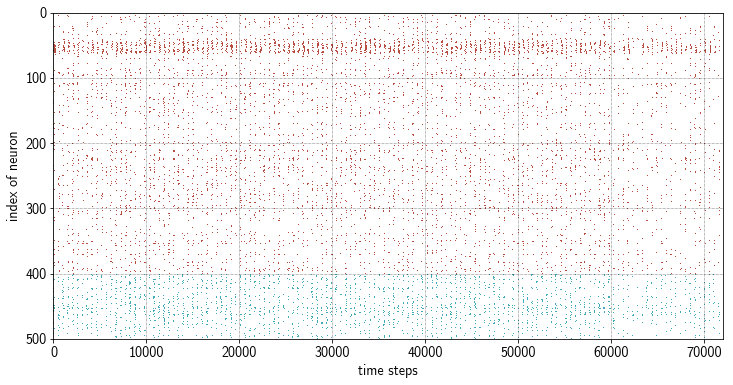

In [67]:
exp2.net.plot.reservoirSpikeTrain(figsize=(12,6))

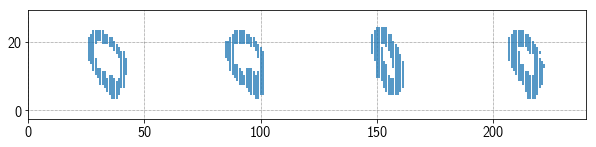

In [65]:
plt.figure(figsize=(10,2))
plt.xlim((0,240))
pl = plt.eventplot(exp2.net.inputSpikes)

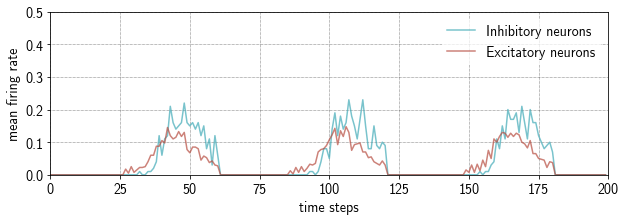

In [56]:
exp2.net.plot.reservoirRates(figsize=(10,3), fr=0, to=200)

In [57]:
exp2.fitRidgeClassifier()

(spikes) score: 0.455
(rates) score: 0.54
(frequency) score: 0.545


In [58]:
preditions_freq = exp2.clfFreq.predict(exp2.freqTest)
preditions_rates = exp2.clfRates.predict(exp2.ratesTest)
preditions_spikes = exp2.clfSpikes.predict(exp2.spikesTest)

In [59]:
scoreA = np.sum(preditions_freq[:nTest] == -1)/nTest
print(scoreA)
scoreB = np.sum(preditions_freq[nTest:] == 1)/nTest
print(scoreB)

0.52
0.57


In [60]:
scoreA = np.sum(preditions_rates[:nTest] == -1)/nTest
print(scoreA)
scoreB = np.sum(preditions_rates[nTest:] == 1)/nTest
print(scoreB)

0.73
0.35


In [61]:
scoreA = np.sum(preditions_spikes[:nTest] == -1)/nTest
print(scoreA)
scoreB = np.sum(preditions_spikes[nTest:] == 1)/nTest
print(scoreB)

0.6
0.31
